In [3]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Carregando DataSet 
df = pd.read_csv('dados/dataset.csv')

In [5]:
df.shape

(11000, 12)

In [6]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [9]:
cats = ['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [10]:
nums = ['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto', 'compras_anteriores', 
        'desconto', 'peso_gramas']

In [11]:
target = ['entregue_no_prazo'] # Variável alvo

In [12]:
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [13]:
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [14]:
df[target].value_counts()

entregue_no_prazo
1                    6563
0                    4437
Name: count, dtype: int64

### Limpeza de Dados

In [15]:
df.isna().sum()

ID                         0
corredor_armazem           0
modo_envio                 0
numero_chamadas_cliente    0
avaliacao_cliente          0
custo_produto              0
compras_anteriores         0
prioridade_produto         0
genero                     0
desconto                   0
peso_gramas                0
entregue_no_prazo          0
dtype: int64

## Valores Duplicados

In [16]:
df.duplicated().sum()

0

## Tratamento de Valores Outliers 

In [17]:
print(f"Número de linhas antes de filtar valores extremos (Outliers): {len(df)}")

Número de linhas antes de filtar valores extremos (Outliers): 11000


In [18]:
df[nums].head()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


In [19]:
# Aplicar o conceito a uma única variável

df.desconto.mean()

13.372545454545454

In [20]:
df.desconto.std() #Desvio padrão - distância da média

16.20494287359407

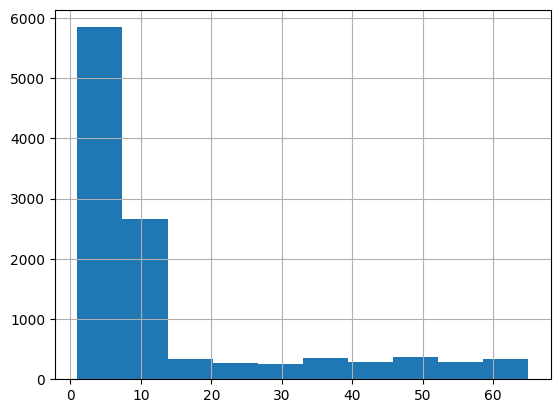

In [21]:
df.desconto.hist();

In [22]:
# Calcula os limites superior e inferior 
# Um valor OUTLIER é aquele que está abaixo do limite inferior ou acima do lim superior

limite_superior = df.desconto.mean() + 3 * df.desconto.std()
print(f"Limite Superior: {limite_superior}")

limite_inferior = df.desconto.mean() - 3 * df.desconto.std()
print(f"Limite Inferior: {limite_inferior}")

Limite Superior: 61.987374075327665
Limite Inferior: -35.24228316623676


In [23]:
# Extrai os registros com outliers na coluna desconto

df_outliers_desconto = df[(df.desconto <= limite_inferior) | (df.desconto >= limite_superior)]
df_outliers_desconto

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
36,37,D,Navio,3,5,137,4,alta,F,62,1477,1
60,61,D,Navio,3,1,221,3,baixa,F,64,2794,1
62,63,A,Navio,5,1,105,6,media,M,62,1292,1
111,112,B,Caminhao,4,2,239,3,baixa,F,65,3679,1
122,123,A,Caminhao,4,2,160,3,baixa,M,64,1714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3005,3006,F,Caminhao,5,2,159,3,media,F,63,1675,1
3017,3018,F,Aviao,4,1,235,2,alta,M,64,2107,1
3040,3041,C,Navio,3,2,149,3,media,F,64,1920,1
3068,3069,A,Navio,4,3,139,3,baixa,M,64,1814,1


In [24]:
# Filtra o dataframe removendo os registros com outliers na coluna desconto
df = df[(df.desconto > limite_inferior) & (df.desconto < limite_superior)]

In [25]:
print(f"Número de linhas depois de filtrar os outliers: {len(df)}")

Número de linhas depois de filtrar os outliers: 10819


### Automatização da verificação dos OUTLIERS e exclusão desses

In [26]:
#Criando array np True do tamanho do datafrmae
registros = np.array([True] * len(df)) 
type(registros)

numpy.ndarray

In [27]:
# Verificando valores True no array
np.count_nonzero(registros == True)

10819

In [28]:
np.count_nonzero(registros == False)

0

In [29]:
df[nums].columns

Index(['numero_chamadas_cliente', 'avaliacao_cliente', 'custo_produto',
       'compras_anteriores', 'desconto', 'peso_gramas'],
      dtype='object')

In [30]:
# Variáveis numpericas (Sem a variável desconto)
nums2 = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'compras_anteriores',
        'custo_produto',
        'peso_gramas']

In [31]:
# Loop por cada variável numérica 
for col in nums2:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col]))
    
    # Mantém valores com menos de 3 z-score absoluto
    registros = (zscore < 3) & registros

In [32]:
np.count_nonzero(registros == True)

10643

In [33]:
np.count_nonzero(registros == False)

176

In [34]:
# Removemos os registros com o z-score abaixo de 3 nas colunas numéricas
df = df[registros]

In [35]:
print(f"Número de linhas após filtrar valores extremos (OUTLIERS): {len(df)}")

Número de linhas após filtrar valores extremos (OUTLIERS): 10643


## Tratamento de Desbalanceamento de Classes

In [36]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [37]:
df[target].value_counts()

entregue_no_prazo
1                    6282
0                    4361
Name: count, dtype: int64

## Engenharia de Atributos

### FEATURE SELECTION

In [38]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [39]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
6074,6075,A,Navio,4,3,145,4,media,M,2,5735,0
2961,2962,B,Navio,4,3,202,3,baixa,F,48,2213,1
6089,6090,F,Navio,4,1,132,6,alta,M,8,4902,1
2883,2884,B,Aviao,3,1,248,3,baixa,M,9,2616,1
9625,9626,F,Navio,7,4,301,4,baixa,F,1,1150,0


In [40]:
df[nums].corr()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.013398,0.328148,0.246604,-0.132172,-0.285186
avaliacao_cliente,0.013398,1.000000,0.006332,0.004893,0.000551,-0.004440
custo_produto,0.328148,0.006332,1.000000,0.163395,-0.137703,-0.146885
compras_anteriores,0.246604,0.004893,0.163395,1.000000,-0.106093,-0.235066
desconto,-0.132172,0.000551,-0.137703,-0.106093,1.000000,-0.365062
peso_gramas,-0.285186,-0.004440,-0.146885,-0.235066,-0.365062,1.000000


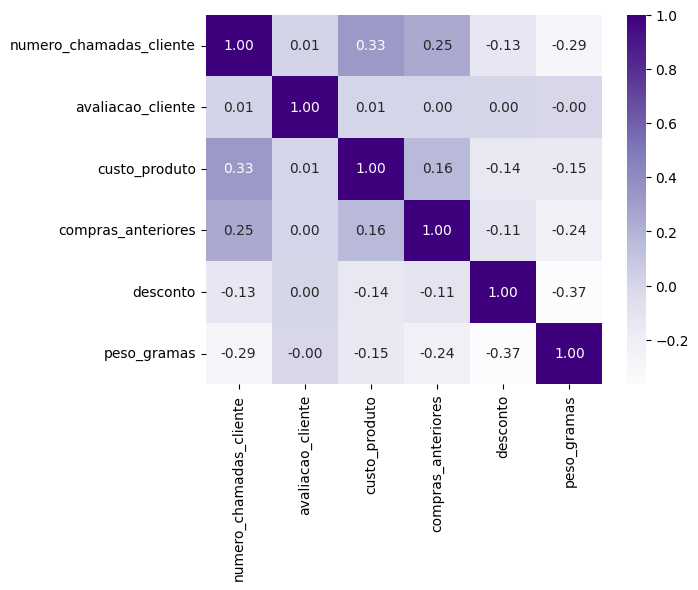

In [41]:
# Mapa gráfico
sns.heatmap(df[nums].corr(), cmap = 'Purples', annot = True, fmt = '.2f');

**Decisão**: Os recursos que ultrapassaram o lim (+/- 0,05) com a variável alvo (entregue_no_prazo) serão escolhidos
A variável avalicao cliente não será utizada, bem como ID por não apresentar info util

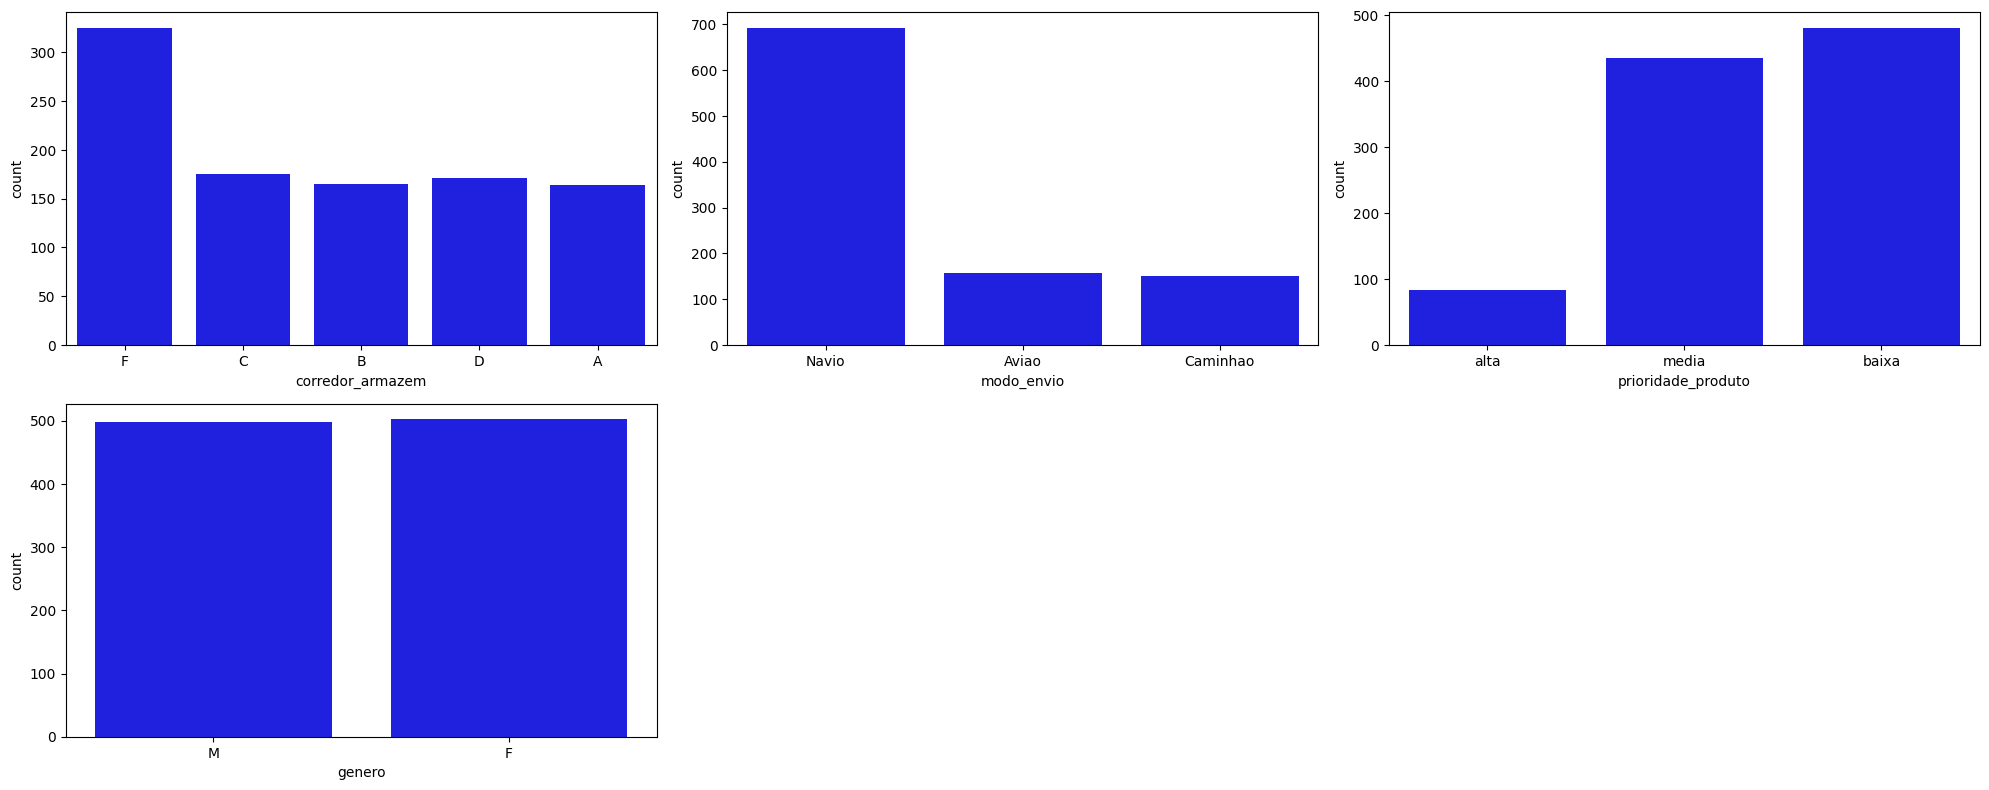

In [42]:
# Verificando para variáveis categóricas
df_sample = df.sample(1000, random_state =42)
plt.figure(figsize = (20,8))
for i in range(0, len(cats)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df_sample[cats[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

**Decisão**: A variável de gênero não será considerada, por não gerar impacto, haja vista a euqalidade das proporções

### FEATURE SELECTION

In [43]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [44]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [45]:
# Criar uma cópia do DF original
df_eng = df.copy()

In [46]:
df_eng.shape

(10643, 12)

In [48]:
df_eng.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

## 1- Performance de envio do produto por prioridade do produto

Todo atraso no envio dos é igual, ou seja, tem a mesma proporção? A prioridade dos produtos gera mais ou menos atrasos?

Criarei nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:

- Se a prioridade do produto era alta e houve atraso no envio, o atraso é crítico
- Se a prioridade do produto era média e houve atraso no envio, o atraso é problemático
- Se a prioridade do produto era baixa e houve atraso no envio, o atraso é tolerável
- Outra opção significa que o envio foi feito no prazo e não apresenta problemas

In [49]:
df_eng.prioridade_produto.value_counts()

prioridade_produto
baixa    5174
media    4587
alta      882
Name: count, dtype: int64

In [51]:
# Criar variável e preencher com valor NA
df_eng['performance_prioridade_envio'] = np.nan

In [52]:
df_eng.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,NaN
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,NaN
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,NaN
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,NaN
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,NaN


In [73]:
# preencher a variável nova
df_eng['performance_prioridade_envio'] = \
np.where((df_eng['prioridade_produto'] == 'alta') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico",
np.where((df_eng['prioridade_produto'] == 'media') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático',
np.where((df_eng['prioridade_produto'] == 'baixa') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável', 
         'Não Houve Atraso')))

In [74]:
df_eng.performance_prioridade_envio.value_counts()

performance_prioridade_envio
Não Houve Atraso       6282
Atraso Tolerável       2134
Atraso Problemático    1917
Atraso Crítico          310
Name: count, dtype: int64

In [75]:
df_eng.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio
4788,4789,D,Caminhao,3,4,195,7,media,F,9,5829,0,Atraso Problemático
7821,7822,B,Aviao,5,5,142,4,media,M,8,5372,0,Atraso Problemático
1294,1295,C,Navio,4,3,190,3,media,F,2,2125,1,Não Houve Atraso
4495,4496,F,Caminhao,5,5,132,3,baixa,M,5,4195,1,Não Houve Atraso
355,356,F,Navio,5,1,266,3,baixa,F,31,3157,1,Não Houve Atraso


In [88]:
# Agrupamento dos novos dados para análise
df_report1 = df_eng.groupby(['performance_prioridade_envio', 'entregue_no_prazo']).\
        agg({'prioridade_produto': ['count']}).reset_index()

# Ajustando os nomes das colunas
df_report1.columns = ['performance_prioridade_envio',
                     'entregue_no_prazo',
                     'contagem']

In [89]:
df_report1.head()

,performance_prioridade_envio,entregue_no_prazo,contagem
0,Atraso Crítico,0,310
1,Atraso Problemático,0,1917
2,Atraso Tolerável,0,2134
3,Não Houve Atraso,1,6282


In [90]:
# Pivot 
df_report1 = pd.pivot_table(df_report1,
                           index = 'performance_prioridade_envio',
                           columns = 'entregue_no_prazo',
                           values = 'contagem').reset_index()

df_report1.head()

entregue_no_prazo,performance_prioridade_envio,0,1
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [91]:
# Novo ajuste das colunas
df_report1.columns = ['Status do Envio', 'Total Atraso', 'Total no Prazo']
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,NaN
1,Atraso Problemático,1917.0,NaN
2,Atraso Tolerável,2134.0,NaN
3,Não Houve Atraso,NaN,6282.0


In [94]:
# Replace no valor NAN por zero
df_report1['Total Atraso'] = df_report1['Total Atraso'].replace(np.nan, 0)
df_report1['Total no Prazo'] = df_report1['Total no Prazo'].replace(np.nan, 0)

In [95]:
df_report1.head()

,Status do Envio,Total Atraso,Total no Prazo
0,Atraso Crítico,310.0,0.0
1,Atraso Problemático,1917.0,0.0
2,Atraso Tolerável,2134.0,0.0
3,Não Houve Atraso,0.0,6282.0


In [97]:
# Concatenar as colunas com o valor "TOTAL"
df_report1['Total'] = df_report1['Total Atraso'] + df_report1['Total no Prazo']

In [99]:
df_report1.drop(df_report1.columns[[1,2]], axis = 1, inplace = True)

In [100]:
df_report1

,Status do Envio,Total
0,Atraso Crítico,310.0
1,Atraso Problemático,1917.0
2,Atraso Tolerável,2134.0
3,Não Houve Atraso,6282.0


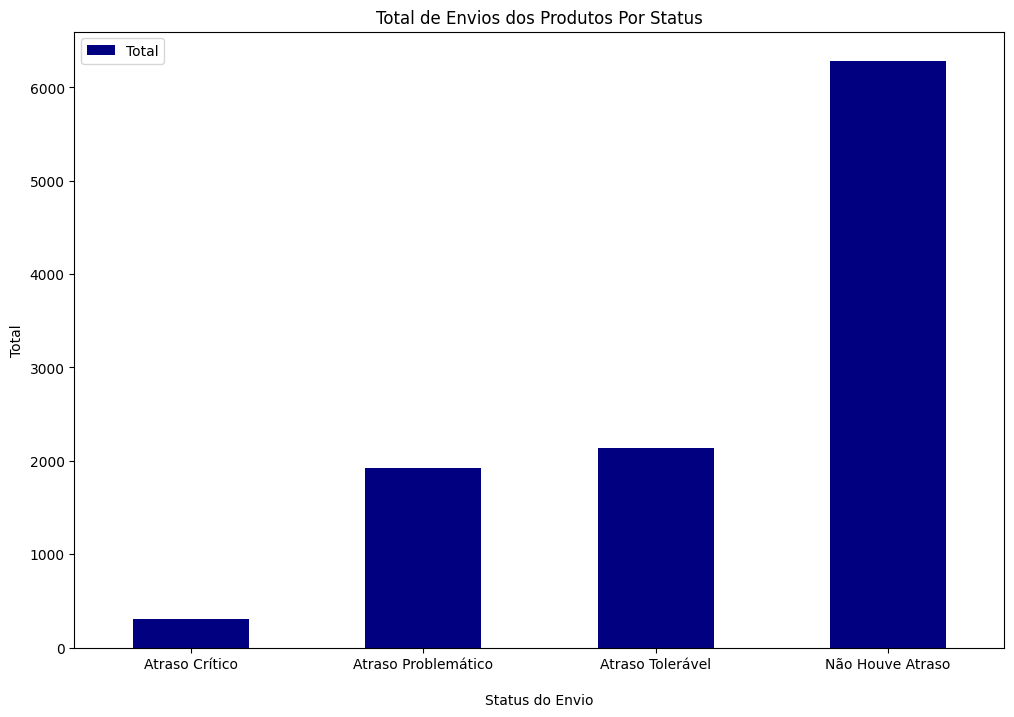

In [102]:
# PLotagem - Passando Status do Envio como index
df_report1.set_index("Status do Envio").plot(kind = "bar",
                                            title = 'Total de Envios dos Produtos Por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'jet',
                                            figsize = (12,8))
plt.xticks(rotation = 0)
plt.show()

## 2- Performance de envio do produto por prioridade de envio e Modo de envio

O Modo de envio dos produtos associado à prioridade de envio dos produtos, tem impacto no atrazo dos produtos?
Criaremos uma nova variável que representa a performance do envio do produto com base na seguinte regra de negócio:
 
- Se a prioridade do produto era alta, o modo de envio era Navio e houve atraso, o atraso é crítico por Navio
- Se a prioridade do produto era média, o modo de envio era Navio e houve atraso, o atraso é problemático por Navio
- Se a prioridade do produto era baixa, o modo de envio era Navio e houve atraso, o atraso é tolerável por Navio

- Se a prioridade do produto era alta, o modo de envio era Avião e houve atraso, o atraso é crítico por Avião
- Se a prioridade do produto era média, o modo de envio era Avião e houve atraso, o atraso é problemático por Avião
- Se a prioridade do produto era baixa, o modo de envio era Avião e houve atraso, o atraso é tolerável por Avião

- Se a prioridade do produto era alta, o modo de envio era Caminhão e houve atraso, o atraso é crítico por Caminhão
- Se a prioridade do produto era média, o modo de envio era Caminhão e houve atraso, o atraso é problemático por Caminhão
- Se a prioridade do produto era baixa, o modo de envio era Caminhão e houve atraso, o atraso é tolerável por Caminhão

In [104]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio'],
      dtype='object')

In [107]:
df_eng.modo_envio.value_counts()

modo_envio
Navio       7212
Aviao       1728
Caminhao    1703
Name: count, dtype: int64

In [109]:
# Condicional para responder a pergunta de negócio nº 2
df_eng['performance_modo_envio'] = \
np.where((df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico Por Navio",
np.where((df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático Por Navio',
np.where((df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Navio') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável Por Navio',
np.where((df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico Por Aviao",
np.where((df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático Por Aviao',
np.where((df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Aviao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável Por Aviao',
np.where((df_eng['prioridade_produto'] == 'alta') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), "Atraso Crítico Por Caminhao",
np.where((df_eng['prioridade_produto'] == 'media') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Problemático Por Caminhao',
np.where((df_eng['prioridade_produto'] == 'baixa') & (df_eng['modo_envio'] == 'Caminhao') & (df_eng['entregue_no_prazo'] == 0), 'Atraso Tolerável Por Caminhao',         
         'Não Houve Atraso')))))))))

In [113]:
df_eng.sample(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio
3612,3613,D,Navio,4,1,248,2,media,M,4,5783,0,Atraso Problemático,Atraso Problemático Por Navio
9603,9604,B,Aviao,5,3,206,2,media,M,7,4531,1,Não Houve Atraso,Não Houve Atraso
3722,3723,A,Navio,4,2,174,3,media,F,10,4318,0,Atraso Problemático,Atraso Problemático Por Navio
9459,9460,B,Aviao,5,5,286,4,alta,F,10,1071,1,Não Houve Atraso,Não Houve Atraso
316,317,C,Navio,4,2,238,2,alta,M,17,3358,1,Não Houve Atraso,Não Houve Atraso
9952,9953,C,Navio,7,4,284,4,baixa,M,3,1751,1,Não Houve Atraso,Não Houve Atraso
6814,6815,C,Navio,6,3,297,4,media,M,2,1954,0,Atraso Problemático,Atraso Problemático Por Navio
5620,5621,C,Aviao,4,2,200,2,baixa,F,8,4222,0,Atraso Tolerável,Atraso Tolerável Por Aviao
1169,1170,F,Navio,6,1,257,3,media,M,37,2239,1,Não Houve Atraso,Não Houve Atraso
5408,5409,A,Navio,3,1,267,3,baixa,M,5,5528,0,Atraso Tolerável,Atraso Tolerável Por Navio


In [137]:
df_report2 = df_eng.groupby(['performance_modo_envio', 'entregue_no_prazo'])\
        .agg({'prioridade_produto': ['count']}).reset_index()

In [138]:
df_report2

,performance_modo_envio,entregue_no_prazo,prioridade_produto
,,,count
0,Atraso Crítico Por Aviao,0,65
1,Atraso Crítico Por Caminhao,0,51
2,Atraso Crítico Por Navio,0,194
3,Atraso Problemático Por Aviao,0,300
4,Atraso Problemático Por Caminhao,0,310
5,Atraso Problemático Por Navio,0,1307
6,Atraso Tolerável Por Aviao,0,331
7,Atraso Tolerável Por Caminhao,0,350
8,Atraso Tolerável Por Navio,0,1453


In [139]:
df_report2.columns = ['performance_modo_envio',
                   'entregue_no_prazo',
                   'contagem']
df_report2.head(5)

,performance_modo_envio,entregue_no_prazo,contagem
0,Atraso Crítico Por Aviao,0,65
1,Atraso Crítico Por Caminhao,0,51
2,Atraso Crítico Por Navio,0,194
3,Atraso Problemático Por Aviao,0,300
4,Atraso Problemático Por Caminhao,0,310


In [140]:
# Pivotagem
df_report2 = pd.pivot_table(df_report2,
                           index = 'performance_modo_envio',
                           columns = 'entregue_no_prazo',
                           values = 'contagem').reset_index()
df_report2.head(10)

entregue_no_prazo,performance_modo_envio,0,1
0,Atraso Crítico Por Aviao,65.0,NaN
1,Atraso Crítico Por Caminhao,51.0,NaN
2,Atraso Crítico Por Navio,194.0,NaN
3,Atraso Problemático Por Aviao,300.0,NaN
4,Atraso Problemático Por Caminhao,310.0,NaN
5,Atraso Problemático Por Navio,1307.0,NaN
6,Atraso Tolerável Por Aviao,331.0,NaN
7,Atraso Tolerável Por Caminhao,350.0,NaN
8,Atraso Tolerável Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [141]:
# Renomear novamente as colunas
df_report2.columns = ['Status Envio',
                   'Total Atraso',
                   'Total no Prazo']
df_report2

,Status Envio,Total Atraso,Total no Prazo
0,Atraso Crítico Por Aviao,65.0,NaN
1,Atraso Crítico Por Caminhao,51.0,NaN
2,Atraso Crítico Por Navio,194.0,NaN
3,Atraso Problemático Por Aviao,300.0,NaN
4,Atraso Problemático Por Caminhao,310.0,NaN
5,Atraso Problemático Por Navio,1307.0,NaN
6,Atraso Tolerável Por Aviao,331.0,NaN
7,Atraso Tolerável Por Caminhao,350.0,NaN
8,Atraso Tolerável Por Navio,1453.0,NaN
9,Não Houve Atraso,NaN,6282.0


In [142]:
# replace de valores NaN por 0
df_report2['Total Atraso'] = df_report2['Total Atraso'].replace(np.nan, 0)
df_report2['Total no Prazo'] = df_report2['Total no Prazo'].replace(np.nan, 0)

df_report2

,Status Envio,Total Atraso,Total no Prazo
0,Atraso Crítico Por Aviao,65.0,0.0
1,Atraso Crítico Por Caminhao,51.0,0.0
2,Atraso Crítico Por Navio,194.0,0.0
3,Atraso Problemático Por Aviao,300.0,0.0
4,Atraso Problemático Por Caminhao,310.0,0.0
5,Atraso Problemático Por Navio,1307.0,0.0
6,Atraso Tolerável Por Aviao,331.0,0.0
7,Atraso Tolerável Por Caminhao,350.0,0.0
8,Atraso Tolerável Por Navio,1453.0,0.0
9,Não Houve Atraso,0.0,6282.0


In [144]:
df_report2["Total"] = df_report2['Total Atraso'] + df_report2['Total no Prazo']

In [146]:
df_report2.drop(df_report2.columns[[1,2]], axis = 1, inplace = True)

In [147]:
df_report2

,Status Envio,Total
0,Atraso Crítico Por Aviao,65.0
1,Atraso Crítico Por Caminhao,51.0
2,Atraso Crítico Por Navio,194.0
3,Atraso Problemático Por Aviao,300.0
4,Atraso Problemático Por Caminhao,310.0
5,Atraso Problemático Por Navio,1307.0
6,Atraso Tolerável Por Aviao,331.0
7,Atraso Tolerável Por Caminhao,350.0
8,Atraso Tolerável Por Navio,1453.0
9,Não Houve Atraso,6282.0


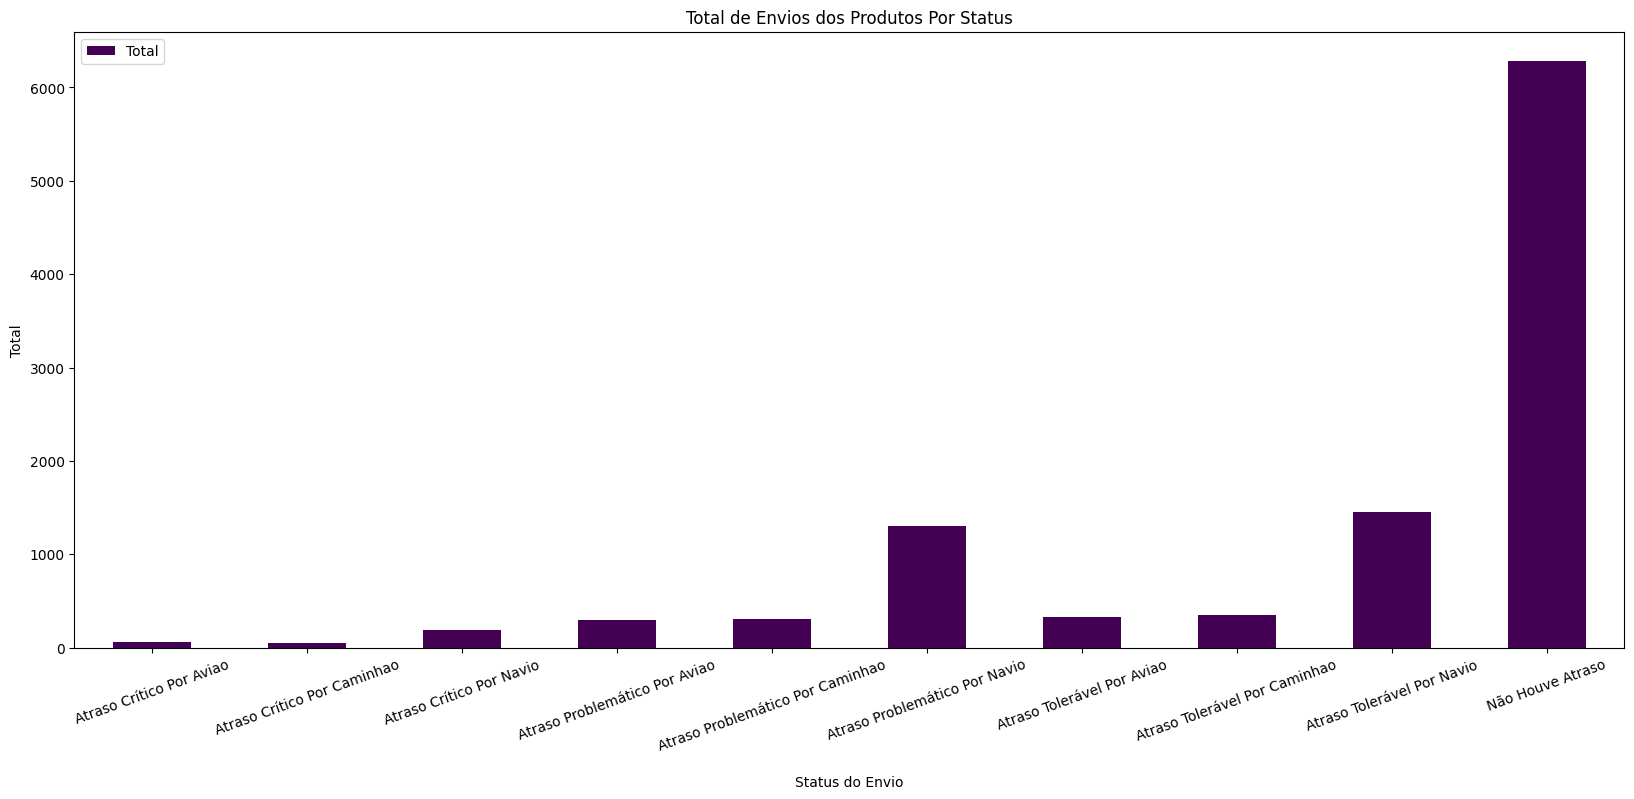

In [151]:
# PLotagem - Passando Status do Envio como index
df_report2.set_index("Status Envio").plot(kind = "bar",
                                            title = 'Total de Envios dos Produtos Por Status',
                                            ylabel = 'Total',
                                            xlabel = '\nStatus do Envio',
                                            colormap = 'viridis',
                                            figsize = (20,8))
plt.xticks(rotation = 20)
plt.show()

## 3 - Performance de envio do produto considerando os Descontos

**Variável 1 - Faixa_desconto**
- Desconto acima ou igual à média
- Desconto abaixo da média

**Variável 2 - Performance_faixa_desconto**

 
- Se a faixa de desconto foi acima ou igual à média e houve atraso = "Atraso na Entrega com Desconto Acima da Média"
- Se a faixa de desconto foi acima ou igual à média NÃO e houve atraso = "Entrega no Prazo com Desconto Acima da Média"
- Se a faixa de desconto foi baixo ou igual à média e houve atraso = "Atraso na Entrega com Desconto Abaixo da Média"
- Se a faixa de desconto foi baixo ou igual à média NÃO e houve atraso = "Entrega no Prazo com Desconto Abaixo da Média"

In [154]:
df_eng.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio'],
      dtype='object')

In [156]:
df_eng.desconto.describe()

count    10643.000000
mean        12.528047
std         14.991968
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         61.000000
Name: desconto, dtype: float64

In [157]:
# Variável 1
df_eng['faixa_desconto'] = np.where(df_eng.desconto >= 12, 'Desconto Acima da Média', 'Desconto Abaixo da Média')

In [160]:
# Variável 2
df_eng['performance_faixa_desconto'] =\
np.where((df_eng['faixa_desconto'] == 'Desconto Acima da Média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Acima da Média',
np.where((df_eng['faixa_desconto'] == 'Desconto Abaixo da Média') & (df_eng['entregue_no_prazo'] == 0), 'Atraso na Entrega com Desconto Abaixo da Média',
np.where((df_eng['faixa_desconto'] == 'Desconto Acima da Média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Acima da Média',
np.where((df_eng['faixa_desconto'] == 'Desconto Abaixo da Média') & (df_eng['entregue_no_prazo'] == 1), 'Entrega no Prazo com Desconto Abaixo da Média',
np.nan))))

In [162]:
df_eng.performance_faixa_desconto.value_counts()

performance_faixa_desconto
Atraso na Entrega com Desconto Abaixo da Média    4361
Entrega no Prazo com Desconto Abaixo da Média     3908
Entrega no Prazo com Desconto Acima da Média      2374
Name: count, dtype: int64

In [164]:
# Salvar dataframe formato CSV
df_eng.to_csv('dados/df_eng', sep=';', encoding = 'utf-8')